In [ ]:
# install tweepy
!pip install tweepy

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'lPzdEsMJUTVIML9qb2hq2qDQc'
consumer_api_secret = 'QTn3iBl5hZUy1GCIji44OaR3FX4UGlrEZMzLSZnDoeXVWJDMLI' 
access_token = '1315947567335837696-vw2E7P5rM12ryFZnUKDVR8NNaVVirV'
access_token_secret ='BTbTP5vayxfRuGMRXeAhbkNMFMYWvZqGt9hGW41MjyXsc'

In [ ]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(authorizer ,timeout=15)
all_tweets = []
search_query = 'COVID-19'

for tweet_object in tweepy.Cursor(api.search,q=search_query+" -filter:retweets",lang='en',result_type='recent').items(200):
    all_tweets.append(tweet_object.text)

In [ ]:
print(all_tweets)

['Impact of COVID-19 on chronic cardiovascular patients\nhttps://t.co/IvQCgu3Uk5', 'GRAPHIC-New U.S. COVID-19 cases rise 11% last week, Midwest ... https://t.co/QzO0N4ojHQ', 'We have been experiencing some problems with subscriber log-ins and apologise for the inconvenience caused. #WFH… https://t.co/hWVwfJ0QHF', '@solsilvanazb https://t.co/zVCYuzR9PN\nThis aged well', '@colvinj Covid-19 likes this tweet https://t.co/oC1u9h0f8v', "Vice President Venkaiah Naidu Explains How He Recovered From COVID-19: 'Physical Fitness, Mental Tenacity and Desi… https://t.co/8tiA1n2IJV", 'UAE Central Bank reveals 3 common scams during Covid-19 https://t.co/UG0pwybs6g', 'A 25-year-old man becomes first in the U.S. to contract coronavirus twice @CNBC https://t.co/ErPl6gKgnD', "Soon Covid-19 will be treatable, but it shouldn't just be the rich who benefit | Jeremy Farrar https://t.co/nt6fKTeUnO", 'New Milford COVID 19 update - https://t.co/whGSmVn6CF  #NewMilfordCT https://t.co/ESjVMGfBBU', '“These figures

In [ ]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')  
from nltk.corpus import stopwords 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [ ]:
X = tweets.iloc[:, 10].values  
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [ ]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [135]:
total_negative = 0
total_positive = 0
total_neutral = 0
for tweet in all_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    #print(processed_tweet ,":", sentiment)
    if sentiment == "negative":
      total_negative += 1
    if sentiment == "positive":
      total_positive += 1
    if sentiment == "neutral":
      total_neutral +=1 

print ("Total Positive: ",total_positive, "Total Negative: ",total_negative,"Total Neutral:", total_neutral)


Total Positive:  4 Total Negative:  53 Total Neutral: 143


In [ ]:
!pip install matplotlib

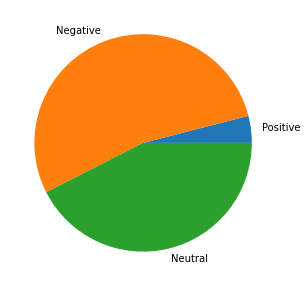

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
labels = ["Positive", "Negative", "Neutral"]
values = [total_positive, total_negative, total_neutral]

plt.pie(values, labels=labels)


plt.show()

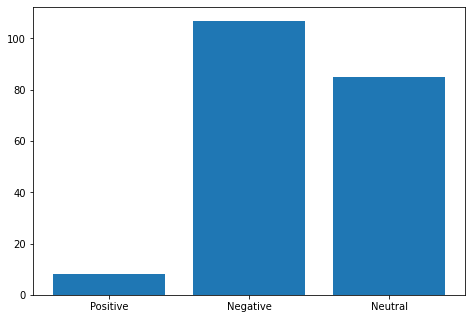

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentiments = ['Positive', 'Negative', 'Neutral']
total = [total_positive, total_negative, total_neutral]
ax.bar(sentiments,total)
plt.show()
